# Aula 2 - Estatística, visualização de dados e distribuição
#### _BOOT CAMP - Alura_

In [3]:
#1 Importando biblioteca pandas 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#2 Puxando e conhecendo a base

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

df = pd.read_csv(url_dados, compression = 'zip')

In [4]:
#3 Base resumida

df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [40]:
#4 Pegando as drogas mais relvantes do dataframe

top5drogas=df['droga'].value_counts().index[:5]
top5drogas

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [70]:
#5 Filtrando as top5drogas no dataframe

df2= df.query('droga in @top5drogas')
df2

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


<AxesSubplot:xlabel='droga', ylabel='count'>

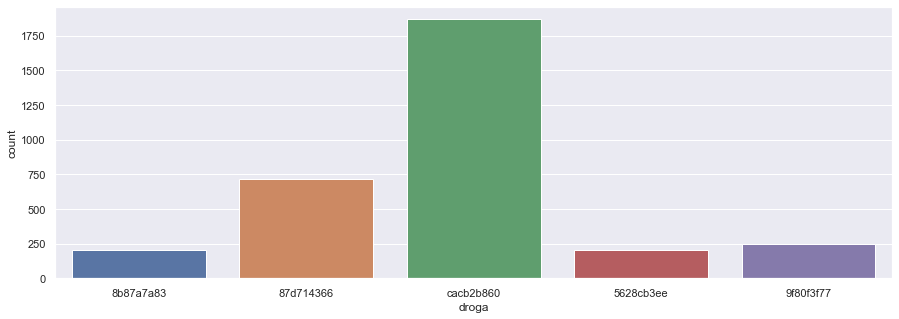

In [53]:
#6 Plotar gráfico de coluna das top 5 drogas com a biblioteca seaborn 

sns.set()
plt.figure(figsize=(15,5))
sns.countplot(x='droga',data=df2)

In [97]:
#7 Quantidade de valores diferentes para a expressão gênica g-0

len(df['g-0'].unique())

14367

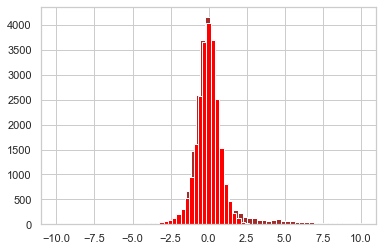

In [122]:
#8 Plotar a faixas da expressão gênica g-0 por

df['g-0'].hist(bins=50,color='brown')
df['g-19'].hist(bins=50,color='red')

plt.show()

# Desafio 1 - Ordenar o gráfico top 5 drogas

# Desafio 2 - Melhorar a visualização dos dados do gráfico top 5 drogas

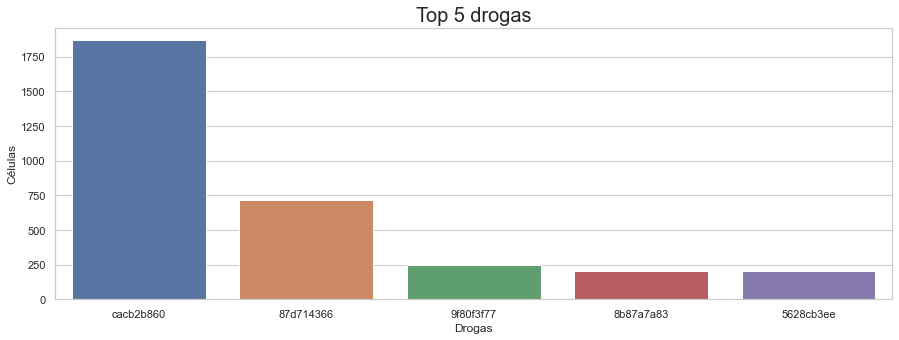

In [95]:
#1 Plotar gráfico de coluna das top 5 drogas com a biblioteca seaborn 

sns.set()
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.countplot(x='droga', order=df2['droga'].value_counts().index ,data=df2).set_title('Top 5 drogas',size=20)
plt.xlabel('Drogas')
plt.ylabel('Células')

plt.show()

# Desafio 3 - PLotar mais de um gráfico de uma vez

###  _Testar com o caso do histograma das expressões gênicas_

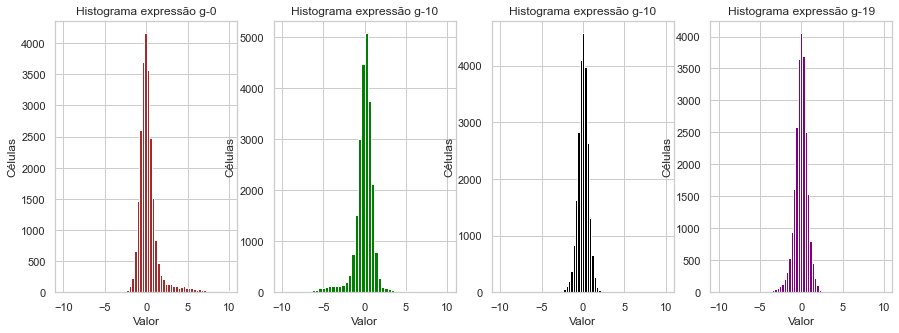

In [175]:
f, axs = plt.subplots(1,4, figsize=(15, 5), sharex=True)

ax1=df['g-0'].hist(bins=50,color='brown',ax=axs[0])
ax2=df['g-10'].hist(bins=50,color='green',ax=axs[1])
ax3=df['g-15'].hist(bins=50,color='black',ax=axs[2])
ax4=df['g-19'].hist(bins=50,color='purple',ax=axs[3])

ax1.set(title='Histograma expressão g-0', xlabel='Valor', ylabel='Células')
ax2.set(title='Histograma expressão g-10', xlabel='Valor', ylabel='Células')
ax3.set(title='Histograma expressão g-10', xlabel='Valor', ylabel='Células')
ax4.set(title='Histograma expressão g-19', xlabel='Valor', ylabel='Células')

plt.show()